# Network Dynamics: Bipartite Graphs

## Introduction

A bipartite graph is a graph in which a set of graph vertices can be divided into two independent sets, and no two graph vertices within the same set are adjacent. In other words, bipartite graphs can be considered as equal to two colorable graphs. Bipartite graphs are mostly used in modeling relationships, especially between two entire separate classes of object. A bipartite graph is also known as a bigraph. In this lesson, we shall look at how to describe and analyze such graphs in networkx.


## Objectives
You will be able to:

- Understand and describe Bipartite graphs in comparison with uni-partite graphs
- Define and analyze bipartite graphs in networkx
- Understand how centrality measures work with bipartite graphs

## Definition
Bipartite graphs $B = (U, V, E)$ have two node sets $U$,$V$ and edges in $E$ that only connect nodes from opposite sets. It is common in the literature to use an spatial analogy referring to the two node sets as top and bottom nodes.
<img src="bp1.png" width=300>

The bipartite algorithms are imported as shown below:

In [6]:
from networkx.algorithms import bipartite

In networkx , **Graph()** or **DiGraph()** classes can be used to represent bipartite graphs. However, you have to keep track of which set each node belongs to, and make sure that **there is no edge between nodes of the same set**. 

<img src="bp2.png" width=400>
The convention used in NetworkX is to use a **node attribute** named **bipartite** with values 0 or 1 to identify the sets each node belongs to. 

In [7]:
import networkx as nx
B = nx.Graph()

# Add nodes with the node attribute "bipartite"
B.add_nodes_from([1, 2, 3, 4], bipartite=0)
B.add_nodes_from(['a', 'b', 'c'], bipartite=1)

# Add edges only between nodes of opposite node sets
B.add_edges_from([(1, 'a'), (1, 'b'), (2, 'b'), (2, 'c'), (3, 'c'), (4, 'a')])

Analyzing bipartite graphs in networkx require a container with all the nodes that belong to one set, in addition to the bipartite graph $B$. If $B$ is connected, you can find the two node sets using a two-coloring algorithm:

In [15]:
print(nx.is_connected(B))
top_nodes, bottom_nodes = bipartite.sets(B)
print(top_nodes, bottom_nodes)

True
{1, 2, 3, 4} {'a', 'b', 'c'}


OR - Using the bipartite node attribute, you can easily get the two node sets

In [16]:
top_nodes = {n for n, d in B.nodes(data=True) if d['bipartite']==0}
bottom_nodes = set(B) - top_nodes
print(top_nodes, bottom_nodes)

{1, 2, 3, 4} {'a', 'b', 'c'}


So you can easily use the bipartite algorithms that require, as an argument, a container with all nodes that belong to one node set:

In [18]:
bipartite.density(B, top_nodes)

0.5

All bipartite graph generators in networkx build bipartite graphs with the bipartite node attribute. Thus, you can use the same approach as we saw above. 

NodeDataView({0: {'bipartite': 0}, 1: {'bipartite': 0}, 2: {'bipartite': 0}, 3: {'bipartite': 0}, 4: {'bipartite': 0}, 5: {'bipartite': 0}, 6: {'bipartite': 0}, 7: {'bipartite': 0}, 8: {'bipartite': 0}, 9: {'bipartite': 0}, 10: {'bipartite': 1}, 11: {'bipartite': 1}, 12: {'bipartite': 1}, 13: {'bipartite': 1}, 14: {'bipartite': 1}, 15: {'bipartite': 1}, 16: {'bipartite': 1}, 17: {'bipartite': 1}, 18: {'bipartite': 1}, 19: {'bipartite': 1}})

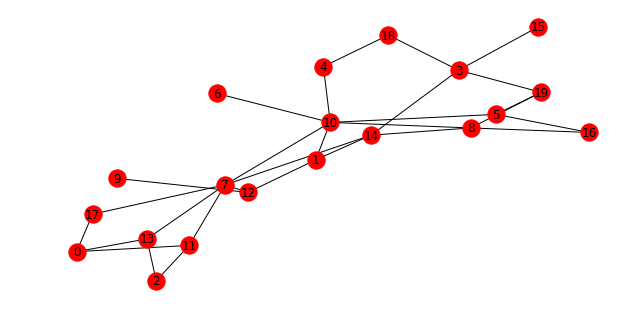

In [56]:
# Generate random bi-partite graph 
RB = bipartite.random_graph(10, 10, 0.3)
RB_top = {n for n, d in RB.nodes(data=True) if d['bipartite']==0}
RB_bottom = set(RB) - RB_top

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
nx.draw(RB, with_labels=True)
RB.nodes(data=True)

### Davis Club

Let's use the data collected by Davis et al. in 1930s about the observed attendance at 14 social events by 18 women in a Southern state of the USA. [Click here ](https://networkx.github.io/documentation/stable/auto_examples/algorithms/plot_davis_club.html) to see the implementation in networkx.  The nodes in the graph are both women and events, and each women is linked to the events that she attended.

[('Evelyn Jefferson', {'bipartite': 0}),
 ('Laura Mandeville', {'bipartite': 0}),
 ('Theresa Anderson', {'bipartite': 0}),
 ('Brenda Rogers', {'bipartite': 0}),
 ('Charlotte McDowd', {'bipartite': 0}),
 ('Frances Anderson', {'bipartite': 0}),
 ('Eleanor Nye', {'bipartite': 0}),
 ('Pearl Oglethorpe', {'bipartite': 0}),
 ('Ruth DeSand', {'bipartite': 0}),
 ('Verne Sanderson', {'bipartite': 0}),
 ('Myra Liddel', {'bipartite': 0}),
 ('Katherina Rogers', {'bipartite': 0}),
 ('Sylvia Avondale', {'bipartite': 0}),
 ('Nora Fayette', {'bipartite': 0}),
 ('Helen Lloyd', {'bipartite': 0}),
 ('Dorothy Murchison', {'bipartite': 0}),
 ('Olivia Carleton', {'bipartite': 0}),
 ('Flora Price', {'bipartite': 0}),
 ('E1', {'bipartite': 1}),
 ('E2', {'bipartite': 1}),
 ('E3', {'bipartite': 1}),
 ('E4', {'bipartite': 1}),
 ('E5', {'bipartite': 1}),
 ('E6', {'bipartite': 1}),
 ('E7', {'bipartite': 1}),
 ('E8', {'bipartite': 1}),
 ('E9', {'bipartite': 1}),
 ('E10', {'bipartite': 1}),
 ('E11', {'bipartite': 1}

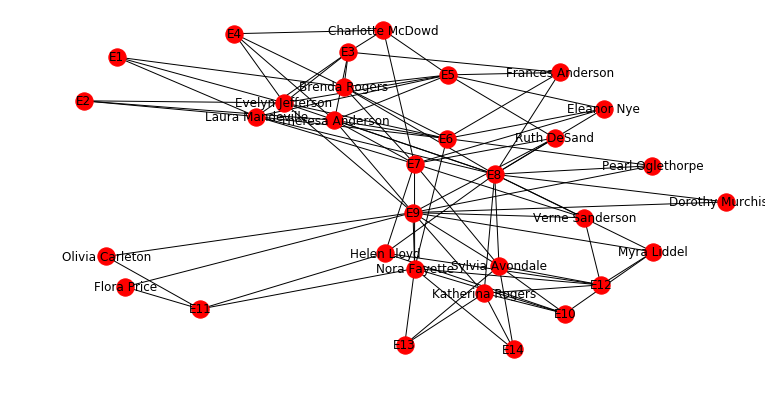

In [59]:
D = nx.davis_southern_women_graph()
plt.figure(figsize=(10,5))
nx.draw(D, with_labels=True)
list(D.nodes(data=True))

See how all the women are connected only through the events E1-14 that they have attended. There is no direct link between any women. 

### Graph Projections

We can extaract the uni-partite graph with only women using **Graph Projections**. We can weight the edges of the projection using different criteria, for instance, we can make the weight of an edge to represent the number of event that the two women attended. See NetworkX documentation for [bipartite projections](https://networkx.github.io/documentation/networkx-1.9.1/reference/generated/networkx.algorithms.bipartite.projection.weighted_projected_graph.html). In such a graph, all women , who attended the same event(s) will be connected together as neighbors. 

In [42]:
females = {n for n, d in D.nodes(data=True) if d['bipartite']==0}
Fem_Graph = bipartite.weighted_projected_graph(D, females)

['Verne Sanderson', 'Frances Anderson', 'Helen Lloyd', 'Myra Liddel', 'Theresa Anderson', 'Evelyn Jefferson', 'Olivia Carleton', 'Dorothy Murchison', 'Ruth DeSand', 'Katherina Rogers', 'Flora Price', 'Brenda Rogers', 'Charlotte McDowd', 'Sylvia Avondale', 'Nora Fayette', 'Eleanor Nye', 'Laura Mandeville', 'Pearl Oglethorpe']


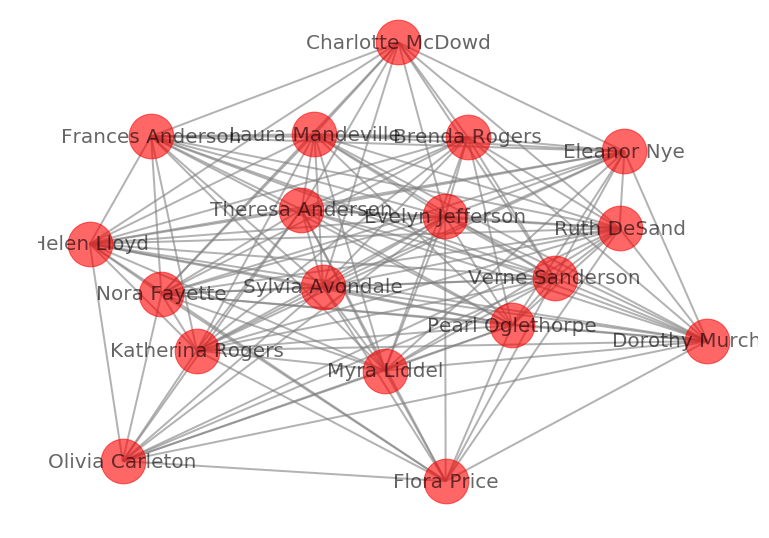

In [96]:
plt.figure(figsize=(10, 7))
nx.draw(Fem_Graph, with_labels=True, node_size=2000, node_color = 'red', edge_color='grey',width=2, alpha=0.6, font_size=20)
print(list(Fem_Graph.nodes()))

So now we see a lot of new edges. This approach of taking projections can help us create uni-partite graphs to simply analysis activities in most cases. The number of interactions are reflected as edge weights as we can see below:

In [97]:
list(Fem_Graph.edges(data=True))

[('Verne Sanderson', 'Frances Anderson', {'weight': 1}),
 ('Verne Sanderson', 'Myra Liddel', {'weight': 3}),
 ('Verne Sanderson', 'Theresa Anderson', {'weight': 3}),
 ('Verne Sanderson', 'Olivia Carleton', {'weight': 1}),
 ('Verne Sanderson', 'Ruth DeSand', {'weight': 3}),
 ('Verne Sanderson', 'Brenda Rogers', {'weight': 2}),
 ('Verne Sanderson', 'Nora Fayette', {'weight': 3}),
 ('Verne Sanderson', 'Katherina Rogers', {'weight': 3}),
 ('Verne Sanderson', 'Sylvia Avondale', {'weight': 4}),
 ('Verne Sanderson', 'Pearl Oglethorpe', {'weight': 2}),
 ('Verne Sanderson', 'Helen Lloyd', {'weight': 3}),
 ('Verne Sanderson', 'Evelyn Jefferson', {'weight': 2}),
 ('Verne Sanderson', 'Dorothy Murchison', {'weight': 2}),
 ('Verne Sanderson', 'Flora Price', {'weight': 1}),
 ('Verne Sanderson', 'Charlotte McDowd', {'weight': 1}),
 ('Verne Sanderson', 'Eleanor Nye', {'weight': 2}),
 ('Verne Sanderson', 'Laura Mandeville', {'weight': 2}),
 ('Frances Anderson', 'Myra Liddel', {'weight': 1}),
 ('Frances 

## Bipartite Centrality Measures 

Bipartite centrality uses different algorithms than unipartite graphs because the normalization of the measures is different. In unipartite networks the maximum degree of a node is $n-1$ where $n$ is the total number of nodes of a graph, but in a bipartite graph a node maximum degree is only the total number of nodes in the opposite set, that is, the maximum degree for a woman in our graph is the number of events. 

In order to use these functions you have to pass as an argument a set with all nodes in one bipartite set
### Degree Centrality

In [48]:
from operator import itemgetter
cent = bipartite.degree_centrality(D, females)
sorted(cent.items(), key=itemgetter(1), reverse=True)

[('E8', 0.7777777777777777),
 ('E9', 0.6666666666666666),
 ('Theresa Anderson', 0.5714285714285714),
 ('Nora Fayette', 0.5714285714285714),
 ('Evelyn Jefferson', 0.5714285714285714),
 ('E7', 0.5555555555555556),
 ('Brenda Rogers', 0.5),
 ('Sylvia Avondale', 0.5),
 ('Laura Mandeville', 0.5),
 ('E6', 0.4444444444444444),
 ('E5', 0.4444444444444444),
 ('Katherina Rogers', 0.42857142857142855),
 ('Helen Lloyd', 0.3571428571428571),
 ('E12', 0.3333333333333333),
 ('E3', 0.3333333333333333),
 ('Frances Anderson', 0.2857142857142857),
 ('Myra Liddel', 0.2857142857142857),
 ('Ruth DeSand', 0.2857142857142857),
 ('Verne Sanderson', 0.2857142857142857),
 ('Charlotte McDowd', 0.2857142857142857),
 ('Eleanor Nye', 0.2857142857142857),
 ('E10', 0.2777777777777778),
 ('E11', 0.2222222222222222),
 ('E4', 0.2222222222222222),
 ('Pearl Oglethorpe', 0.21428571428571427),
 ('E2', 0.16666666666666666),
 ('E14', 0.16666666666666666),
 ('E13', 0.16666666666666666),
 ('E1', 0.16666666666666666),
 ('Olivia Ca

### Betweenness Centrality

In [49]:
centb = bipartite.betweenness_centrality(D, females)
sorted(centb.items(), key=itemgetter(1), reverse=True)

[('E8', 0.24381946234957552),
 ('E9', 0.22551359177204106),
 ('E7', 0.12950174424519842),
 ('Nora Fayette', 0.11346136204298476),
 ('Evelyn Jefferson', 0.09658472108029267),
 ('Theresa Anderson', 0.08759468547944677),
 ('Sylvia Avondale', 0.07170914508501829),
 ('E6', 0.06501635047516072),
 ('Laura Mandeville', 0.05135761326872536),
 ('Brenda Rogers', 0.0494865998160072),
 ('Katherina Rogers', 0.047362754029819695),
 ('Helen Lloyd', 0.04238754006434827),
 ('E5', 0.03769444252500667),
 ('E11', 0.01966539088919154),
 ('E3', 0.01822439085252718),
 ('E12', 0.018094182051395145),
 ('Ruth DeSand', 0.016783108139791406),
 ('Myra Liddel', 0.016344348365012626),
 ('Verne Sanderson', 0.015737665757646964),
 ('E10', 0.011442302600971925),
 ('Frances Anderson', 0.01071434286960598),
 ('Charlotte McDowd', 0.010596096282664414),
 ('Eleanor Nye', 0.00944412334473028),
 ('E4', 0.0077020526738029406),
 ('Pearl Oglethorpe', 0.006800323334013807),
 ('Olivia Carleton', 0.005054505236263333),
 ('Flora Pric

### Closeness Centrality 

In [50]:
centc = bipartite.closeness_centrality(D, females)
sorted(centc.items(), key=itemgetter(1), reverse=True)

[('E8', 0.8461538461538461),
 ('Theresa Anderson', 0.8),
 ('Nora Fayette', 0.8),
 ('Evelyn Jefferson', 0.8),
 ('E9', 0.7857142857142857),
 ('Sylvia Avondale', 0.7741935483870968),
 ('E7', 0.7333333333333333),
 ('Brenda Rogers', 0.7272727272727273),
 ('Katherina Rogers', 0.7272727272727273),
 ('Helen Lloyd', 0.7272727272727273),
 ('Laura Mandeville', 0.7272727272727273),
 ('Ruth DeSand', 0.7058823529411765),
 ('Verne Sanderson', 0.7058823529411765),
 ('E6', 0.6875),
 ('Myra Liddel', 0.6857142857142857),
 ('Frances Anderson', 0.6666666666666666),
 ('Pearl Oglethorpe', 0.6666666666666666),
 ('Eleanor Nye', 0.6666666666666666),
 ('Dorothy Murchison', 0.6486486486486487),
 ('Charlotte McDowd', 0.6),
 ('E5', 0.5945945945945946),
 ('Olivia Carleton', 0.5853658536585366),
 ('Flora Price', 0.5853658536585366),
 ('E12', 0.5641025641025641),
 ('E3', 0.5641025641025641),
 ('E10', 0.55),
 ('E11', 0.5365853658536586),
 ('E4', 0.5365853658536586),
 ('E2', 0.5238095238095238),
 ('E14', 0.5238095238095

## Summary 
In this lesson we looked at Bipartite graphs and how to define, process and simplify such graphs in networkx. Such graphs represent most social interactions , whether real life or on-line. Being able to process such data is the first step towards developing recommendation systems in graph networks as we shall we in our end of day lab. 